In [20]:
import os
import sys
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sys.path.append("/cellar/users/aklie/data/datasets/tf_perturb_seq/config")
from loader import load_colors

In [22]:
dataset_colors = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_colors")
dataset_order = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_order")

# Get all metrics tsv files

In [23]:
metrics_files = glob.glob("/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/*/results/2_qc/2025_12_01/mapping_qc/qc_metrics.tsv")
metrics_files

['/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3/results/2_qc/2025_12_01/mapping_qc/qc_metrics.tsv',
 '/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Huangfu_WTC11-benchmark_TF-Perturb-seq/results/2_qc/2025_12_01/mapping_qc/qc_metrics.tsv',
 '/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/2_qc/2025_12_01/mapping_qc/qc_metrics.tsv',
 '/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2/results/2_qc/2025_12_01/mapping_qc/qc_metrics.tsv']

In [24]:
# Load in and concatenate all metrics
all_metrics = []
for f in metrics_files:
    df = pd.read_csv(f, sep="\t")
    all_metrics.append(df)
all_metrics_df = pd.concat(all_metrics)
all_metrics_df.head()

,sample_name,filter_stage,batch,n_cells_gene,n_cells_guide,median_total_gene_umis,median_num_expressed_genes,median_percent_mito,median_total_guide_umis,mean_n_guides_per_cell,frac_cells_with_guide_assignment,median_n_cells_per_guide
0,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,pre,all,85488,85488,16484.5,4986.0,5.901614,130.0,0.961983,0.578303,172.0
1,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,pre,IGVFDS2050UJNL,15596,15596,29006.0,6514.0,5.931696,586.0,1.257887,0.770518,172.0
2,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,pre,IGVFDS2155EXAM,24512,24512,7073.0,2929.5,5.908371,53.0,0.851379,0.520561,172.0
3,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,pre,IGVFDS3517WZCL,31752,31752,866.0,663.0,5.750917,43.0,0.676493,0.402494,172.0
4,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,pre,IGVFDS6100DRFR,13628,13628,24929.0,6090.0,6.090514,945.0,1.487452,0.871808,172.0


In [25]:
# subset to filter_stage == "post"
post_metrics_df = all_metrics_df[all_metrics_df["filter_stage"] == "post"].reset_index(drop=True)
post_metrics_df

,sample_name,filter_stage,batch,n_cells_gene,n_cells_guide,median_total_gene_umis,median_num_expressed_genes,median_percent_mito,median_total_guide_umis,mean_n_guides_per_cell,frac_cells_with_guide_assignment,median_n_cells_per_guide
0,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,post,all,85488,85488,16484.5,4986.0,5.901614,130.0,0.961983,0.578303,172.0
1,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,post,IGVFDS2050UJNL,15596,15596,29006.0,6514.0,5.931696,586.0,1.257887,0.770518,172.0
2,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,post,IGVFDS2155EXAM,24512,24512,7073.0,2929.5,5.908371,53.0,0.851379,0.520561,172.0
3,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,post,IGVFDS3517WZCL,31752,31752,866.0,663.0,5.750917,43.0,0.676493,0.402494,172.0
4,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,post,IGVFDS6100DRFR,13628,13628,24929.0,6090.0,6.090514,945.0,1.487452,0.871808,172.0
5,Huangfu_WTC11-benchmark_TF-Perturb-seq,post,all,114488,114488,4334.0,2396.0,8.527810,183.0,1.398723,0.908401,335.0
6,Huangfu_WTC11-benchmark_TF-Perturb-seq,post,IGVFDS0471AYHF,23903,23903,4499.0,2451.0,8.616188,243.0,1.604903,0.933230,335.0
7,Huangfu_WTC11-benchmark_TF-Perturb-seq,post,IGVFDS1260YCMC,30079,30079,4319.0,2393.0,8.692660,191.0,1.372984,0.905482,335.0
8,Huangfu_WTC11-benchmark_TF-Perturb-seq,post,IGVFDS1889TBEY,31850,31850,4236.0,2364.0,8.242466,163.0,1.325086,0.890173,335.0
9,Huangfu_WTC11-benchmark_TF-Perturb-seq,post,IGVFDS5642SPLX,28656,28656,4342.0,2392.0,8.588287,164.0,1.335602,0.911013,335.0


# All batches

In [26]:
post_all_batch_df = post_metrics_df[post_metrics_df["batch"] == "all"].reset_index(drop=True)

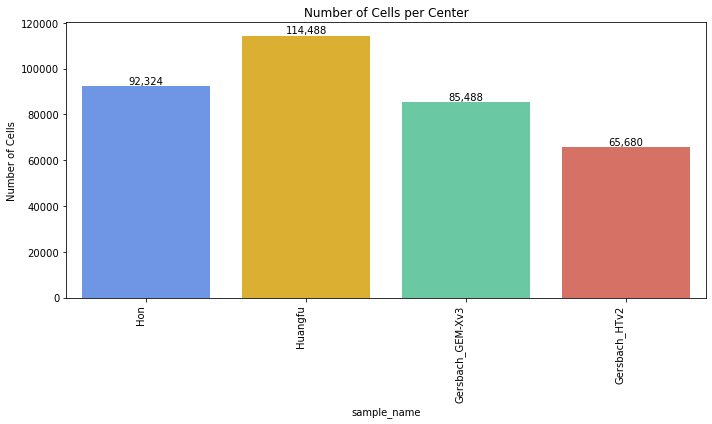

In [33]:
# Plot barplots of n_cells_gene and color by sample_name using dataset_colors and dataset_order
plt.figure(figsize=(10, 6))
sns.barplot(data=post_all_batch_df, x="sample_name", y="n_cells_gene", order=dataset_order, palette=dataset_colors)
plt.xticks(rotation=90, ha="right")
plt.ylabel("Number of Cells")
plt.title("Number of Cells per Center")

# REmove WTC11_benchmark_TF-Perturb-seq from xticklabels
xticklabels = plt.gca().get_xticklabels()
new_labels = [label.get_text().replace("_WTC11-benchmark_TF-Perturb-seq", "") for label in xticklabels]
plt.gca().set_xticklabels(new_labels)

# add n_cells value on top of each bar with commas
for i, row in enumerate(dataset_order):
    n_cells = post_all_batch_df[post_all_batch_df["sample_name"] == row]["n_cells_gene"].values[0]
    plt.text(i, n_cells + 5, f"{n_cells:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

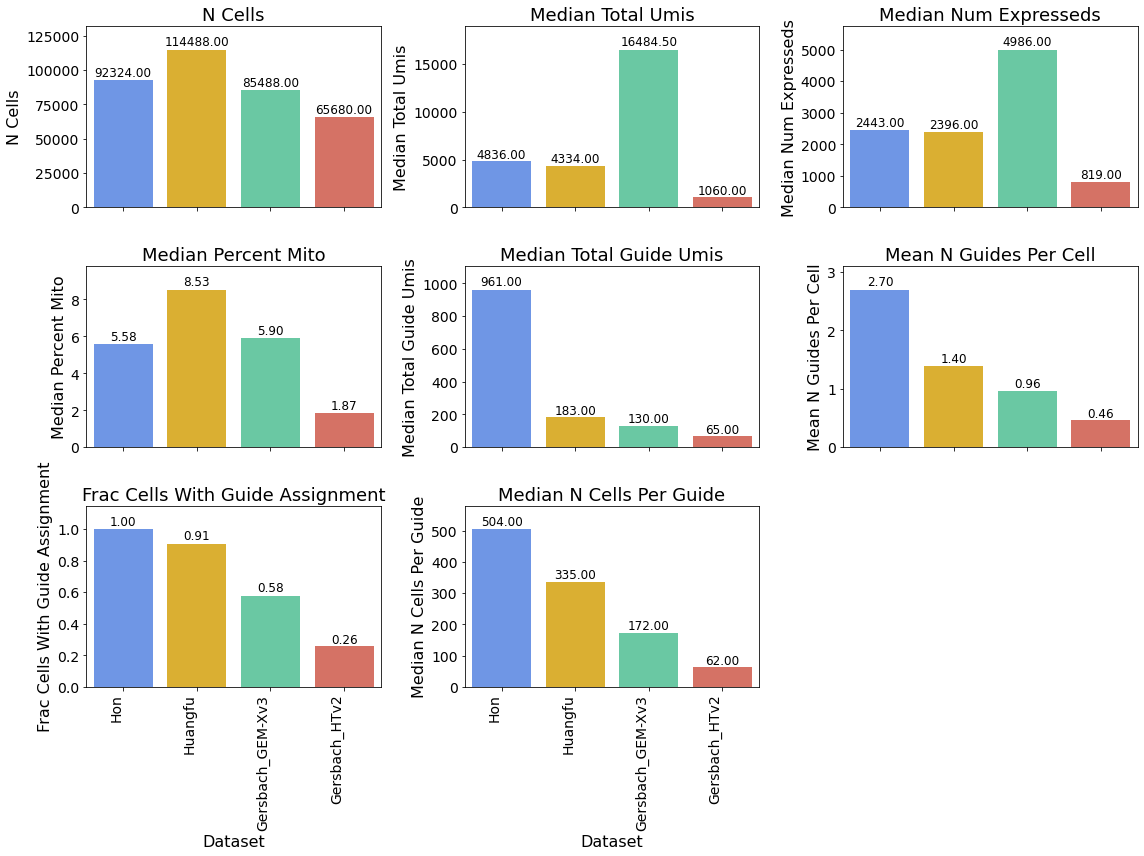

In [93]:
# One plot that includes barplots for 
# median_total_gene_umis
# median_num_expressed_genes
# median_percent_mito	
# median_total_guide_umis
# mean_n_guides_per_cell
# frac_cells_with_guide_assignment
# median_n_cells_per_guide
# as facets

metrics_to_plot = [
    "n_cells_gene",
    "median_total_gene_umis",
    "median_num_expressed_genes",
    "median_percent_mito",
    "median_total_guide_umis",
    "mean_n_guides_per_cell",
    "frac_cells_with_guide_assignment",
    "median_n_cells_per_guide"
]
num_metrics = len(metrics_to_plot)
n_rows = 3
n_cols = (num_metrics + n_rows - 1) // n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows), sharex=True)
axes = axes.flatten()
for ax, metric in zip(axes, metrics_to_plot):
    sns.barplot(data=post_all_batch_df, x="sample_name", y=metric, order=dataset_order, palette=dataset_colors, ax=ax)
    ax.set_title(metric.replace("_gene", "").replace("_", " ").title())
    ax.set_ylabel(metric.replace("_gene", "").replace("_", " ").title())
    ax.set_xlabel("Sample Name")
    ax.set_xticklabels([label.get_text().replace("_WTC11-benchmark_TF-Perturb-seq", "") for label in ax.get_xticklabels()], rotation=90, ha="right")
    for i, row in enumerate(dataset_order):
        value = post_all_batch_df[post_all_batch_df["sample_name"] == row][metric].values[0]
        ax.text(i, value + (0.01 * value), f"{value:.2f}", ha="center", va="bottom", fontsize=12)
    ax.set_ylim(0, post_all_batch_df[metric].max() * 1.15)
    
    # Remove xaxis label for all but bottom row
    if ax not in axes[-n_cols:]:
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Dataset")
    
    # Make fontsize larger
    ax.title.set_fontsize(18)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16) 
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Make sure to remove any unused axes
for j in range(len(metrics_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Split by batch

In [34]:
post_batch_df = post_metrics_df[post_metrics_df["batch"] != "all"].reset_index(drop=True)

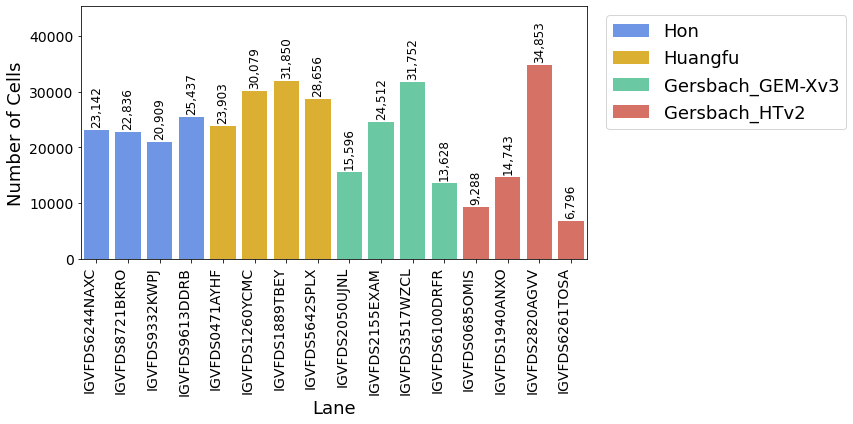

In [68]:
# Make a copy to avoid side effects
df = post_batch_df.copy()

# Respect dataset_order for grouping
df["sample_name"] = pd.Categorical(df["sample_name"],
                                   categories=dataset_order,
                                   ordered=True)

# Sort so batches appear grouped by dataset in the x-axis
df = df.sort_values(["sample_name", "batch"])
batch_order = df["batch"].tolist()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df,
    x="batch",
    y="n_cells_gene",
    hue="sample_name",          # color by dataset
    palette=dataset_colors,     # your dataset→color mapping
    order=batch_order,
    dodge=False                 # one bar per batch
)

plt.xticks(rotation=90, ha="right")
plt.ylabel("Number of Cells")
plt.xlabel("Lane")

# Optional: nicer legend title and remove WTC11_benchmark_TF-Perturb-seq from legend labels
lhandles, llabels = ax.get_legend_handles_labels()
new_llabels = [label.replace("_WTC11-benchmark_TF-Perturb-seq", "") for label in llabels]
ax.legend(lhandles, new_llabels, bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=18)

# Add n_cells value on top of each bar with commas, rotate vertically
for i, batch in enumerate(batch_order):
    subset = df[df["batch"] == batch]
    n_cells = subset["n_cells_gene"].values[0]
    x_pos = i
    plt.text(x_pos, n_cells + 500, f"{n_cells:,}", ha="center", va="bottom", rotation=90, fontsize=12)

# Make ylim larger to accommodate text
ymax = df["n_cells_gene"].max() * 1.3
plt.ylim(0, ymax)

# Make font sizes larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(plt.gca().get_xlabel(), fontsize=18)
plt.ylabel(plt.gca().get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()

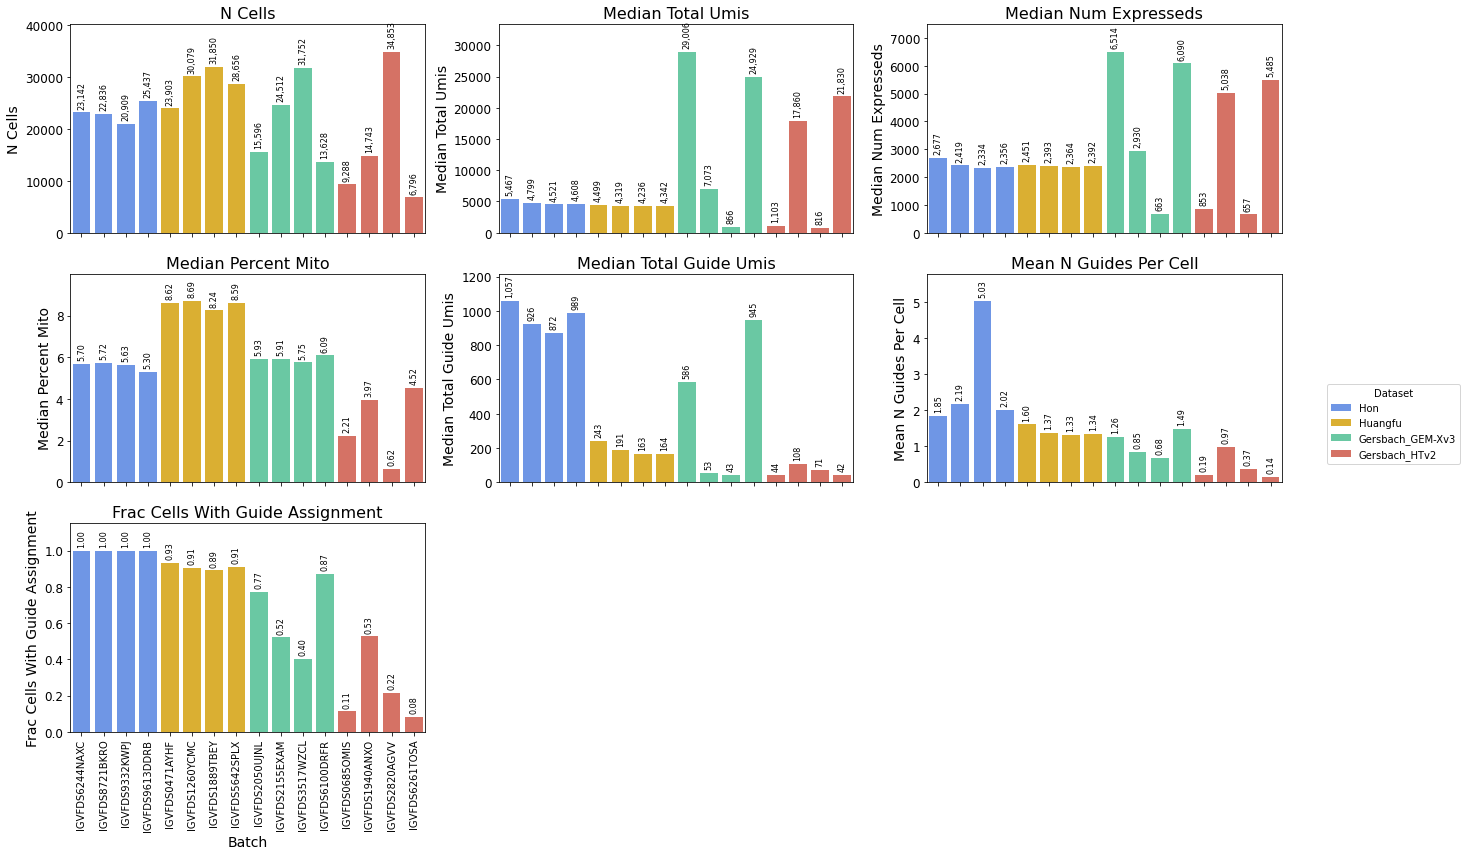

In [97]:
# ---- Prepare ordering: batches grouped by dataset ----
df = post_batch_df.copy()

df["sample_name"] = pd.Categorical(
    df["sample_name"],
    categories=dataset_order,
    ordered=True,
)

df = df.sort_values(["sample_name", "batch"])
batch_order = df["batch"].tolist()

metrics_to_plot = [
    "n_cells_gene",
    "median_total_gene_umis",
    "median_num_expressed_genes",
    "median_percent_mito",
    "median_total_guide_umis",
    "mean_n_guides_per_cell",
    "frac_cells_with_guide_assignment",
]

# Optional: custom formatting for labels per metric
value_formats = {
    "n_cells_gene": "{:,.0f}",
    "median_total_gene_umis": "{:,.0f}",
    "median_num_expressed_genes": "{:,.0f}",
    "median_percent_mito": "{:.2f}",
    "median_total_guide_umis": "{:,.0f}",
    "mean_n_guides_per_cell": "{:.2f}",
    "frac_cells_with_guide_assignment": "{:.2f}",
}

num_metrics = len(metrics_to_plot)
n_rows = 3
n_cols = (num_metrics + n_rows - 1) // n_rows

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(18, 4 * n_rows),
    sharex=True
)
axes = axes.flatten()

for ax, metric in zip(axes, metrics_to_plot):
    # Barplot: x = batch, hue = dataset
    sns.barplot(
        data=df,
        x="batch",
        y=metric,
        hue="sample_name",
        palette=dataset_colors,
        order=batch_order,
        dodge=False,     # one bar per batch, colored by dataset
        ax=ax,
    )

    # Titles / labels
    pretty_name = metric.replace("_gene", "").replace("_", " ").title()
    ax.set_title(pretty_name)
    ax.set_ylabel(pretty_name)

    # Only bottom row gets x-axis label & tick labels
    if ax in axes[-n_cols:]:
        ax.set_xlabel("Batch")
        ax.tick_params(axis="x", labelrotation=90)
    else:
        ax.set_xlabel("")
        ax.tick_params(axis="x", labelbottom=False)

    # Uniform text sizes
    ax.title.set_fontsize(16)
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    ax.tick_params(axis="y", labelsize=12)

    # Add value labels on top of bars
    ymax = df[metric].max()
    offset = 0.02 * ymax if ymax > 0 else 0.01

    fmt = value_formats.get(metric, "{:.2f}")
    for patch in ax.patches:
        height = patch.get_height()
        if height == 0 or pd.isna(height):
            continue
        x = patch.get_x() + patch.get_width() / 2
        ax.text(
            x,
            height + offset,
            fmt.format(height),
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=90,
        )

    ax.set_ylim(0, ymax * 1.15)

# Remove unused axes (if any)
for j in range(len(metrics_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Single legend for the whole figure (dataset colors)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    [l.replace("_WTC11-benchmark_TF-Perturb-seq", "") for l in labels],
    title="Dataset",
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
)
for ax in axes:
    if ax.get_legend() is not None:
        ax.legend_.remove() 

plt.tight_layout()
plt.show()

# DONE!

---